# This jupyter notebook is prepared  by Justin Mazor

# 1. Load Data and perform basic EDA 

## I. import libraries necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import sklearn

## II.  import the data to a dataframe and show the count of rows and columns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jmazor/Machine_A4/main/hrdata3.csv')
print(df.shape)

(12977, 8)


## III. Show the top 5 and last 5 rows 

In [3]:
print(df)

       Unnamed: 0  enrollee_id  city_development_index  experience  \
0               1        29725                   0.776          15   
1               4          666                   0.767          21   
2               6        28806                   0.920           5   
3               7          402                   0.762          13   
4               8        27107                   0.920           7   
...           ...          ...                     ...         ...   
12972       19149          251                   0.920           9   
12973       19150        32313                   0.920          10   
12974       19152        29754                   0.920           7   
12975       19155        24576                   0.920          21   
12976       19156         5756                   0.802           0   

       company_size  last_new_job  training_hours  target  
0                 2             5              47     0.0  
1                 2             4      

## IV. Is there any null values on any column?

Presence of Null Values: False


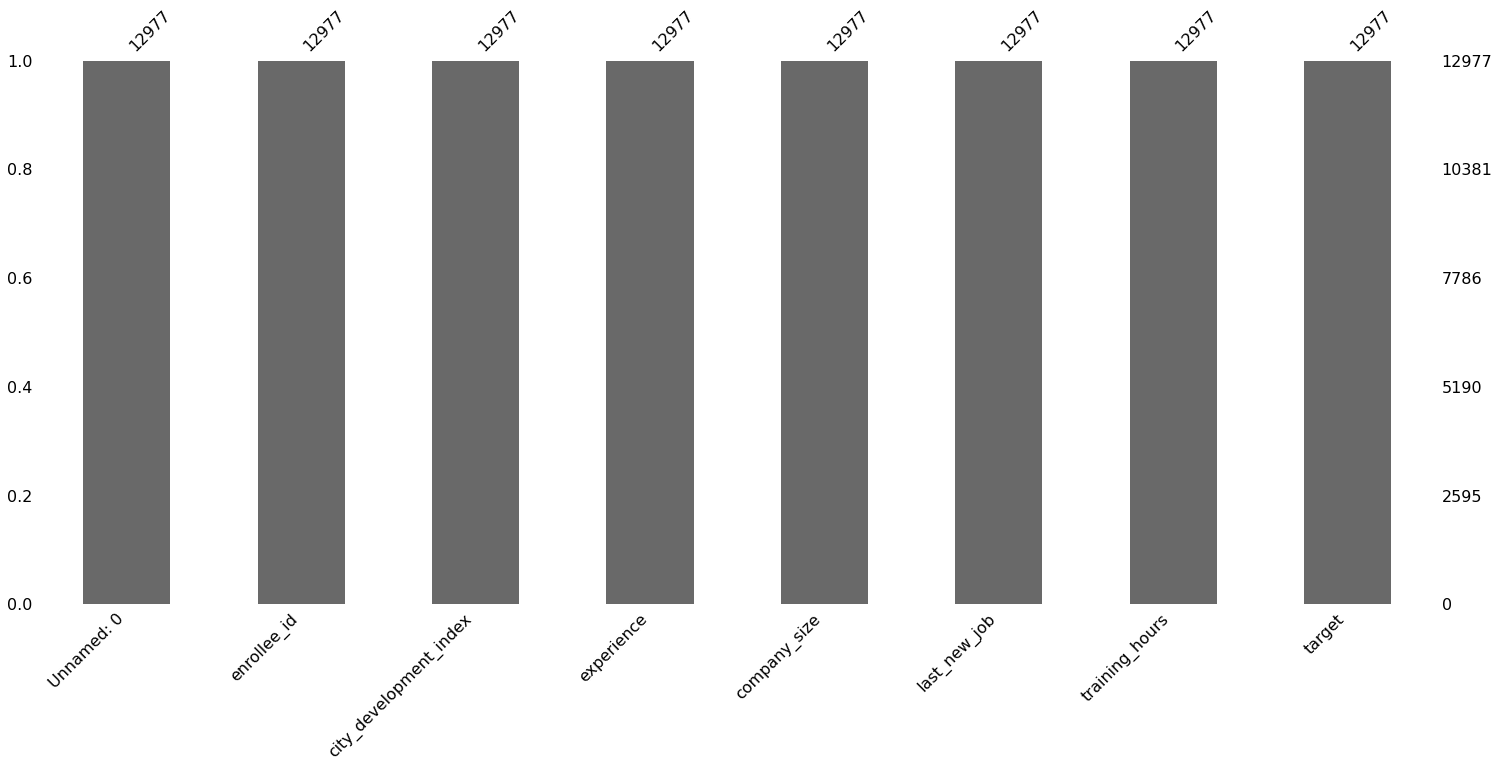

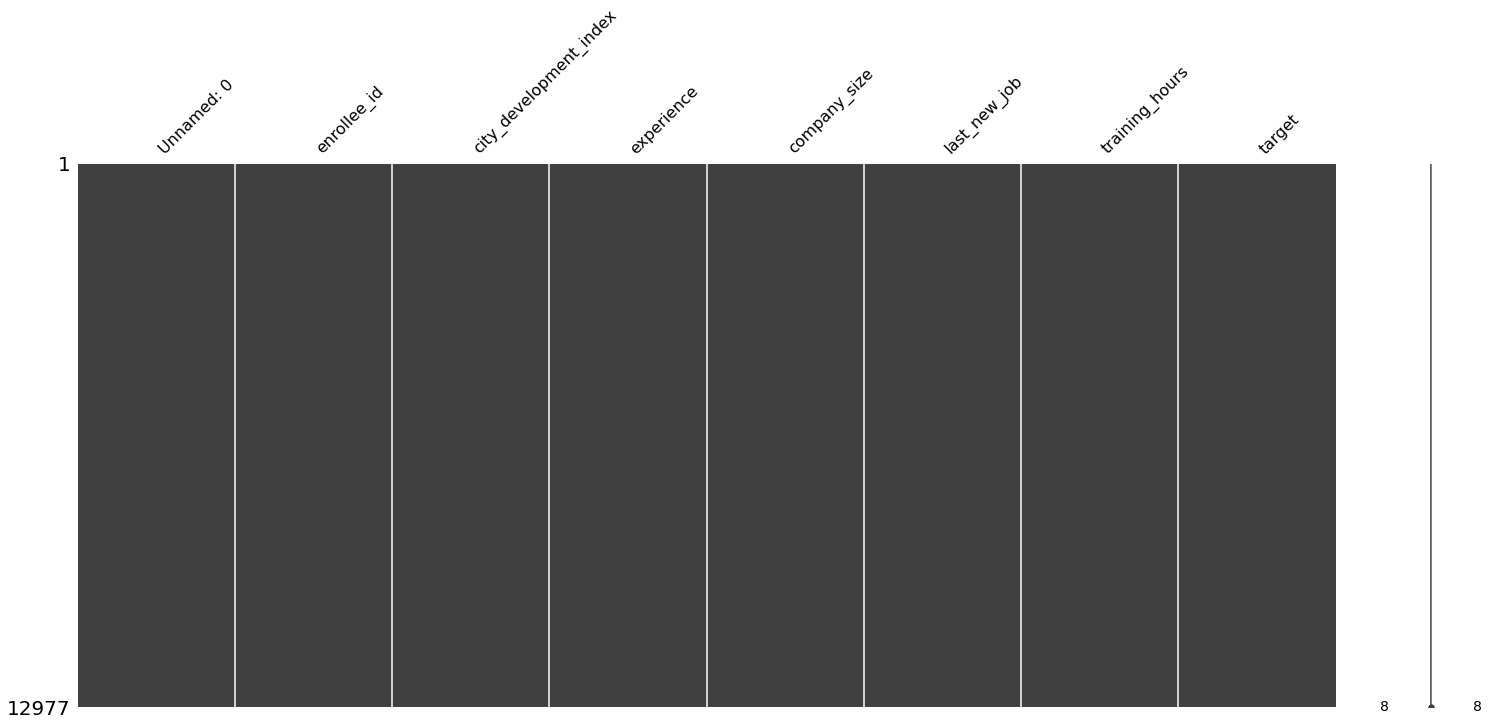

In [4]:
print("Presence of Null Values: "+ str(df.isnull().values.any()))
msno.bar(df)
msno.matrix(df)

## V. Are all the columns numeric such as float or int? If not, please convert them to int before going to the next step.

In [5]:
print(df.dtypes)

Unnamed: 0                  int64
enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object


## VI.  plot the heatmap with correlations to get some more idea about the data.

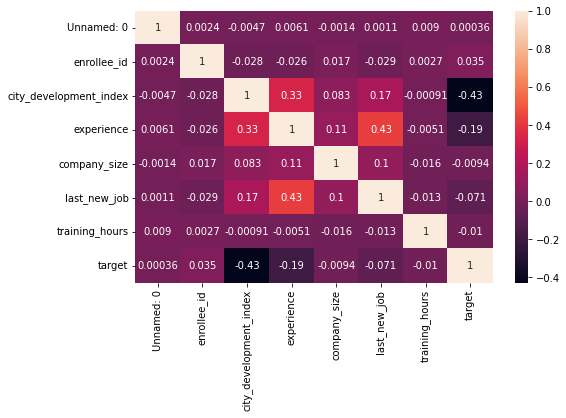

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

# 2.   Feature Selection and Pre-processing  

## I. Put all the data from the dataframe into X, except the enrolle_id and the target columns

In [7]:
X = df.drop(columns=['Unnamed: 0','target', 'enrollee_id'])
print(X)

       city_development_index  experience  company_size  last_new_job  \
0                       0.776          15             2             5   
1                       0.767          21             2             4   
2                       0.920           5             2             1   
3                       0.762          13             0             5   
4                       0.920           7             2             1   
...                       ...         ...           ...           ...   
12972                   0.920           9             2             1   
12973                   0.920          10             3             3   
12974                   0.920           7             1             1   
12975                   0.920          21             2             4   
12976                   0.802           0             4             2   

       training_hours  
0                  47  
1                   8  
2                  24  
3                  18  
4  

## II. Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Indices
X_features = ["city_development_index", "experience", "company_size", "last_new_job", "training_hours"]

In [9]:
print(X_scaled)

print("\nRandom Samples: \n" + str(X_scaled[np.random.choice(X_scaled.shape[0], 5, replace=False)]))

[[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [ 0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [-0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]

Random Samples: 
[[ 0.61311065 -0.58211224 -0.5747232   1.69076217  1.32487296]
 [ 0.15483231 -1.03813823 -0.1179506   1.08113696  0.02155744]
 [-1.76993672 -1.03813823 -0.5747232  -0.74773864 -0.40738184]
 [ 0.39646998  1.54600905 -0.1179506  -0.74773864 -0.85281879]
 [ 0.74642799  1.54600905 -1.4882684  -0.74773864 -0.68784215]]


# 3. KMeans Clustering 

## I. Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in.

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state=47)
kmeans.fit_transform(X_scaled)

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

## II. Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set

In [11]:
print("Cluster Centers\n")
print(kmeans.cluster_centers_)
print("\nInverse\n")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers

[[-0.31364817 -0.63941844 -0.15207764 -0.55076921  0.01170319]
 [ 0.44177356  0.90062111  0.21420141  0.77575864 -0.01648395]]

Inverse

[[ 0.7987756   6.62300698  2.9252866   1.32309922 66.4026881 ]
 [ 0.88943708 16.75426875  3.72717149  3.49907201 64.69413512]]


Centers show our 2 clusters broken up into 5 columns. Our first column city_development_index we can see that the False cluster center city_development_index equals 0.789 and for True 0.88. First cluster 0 experience center is 6.62 and cluster 1 16.75. For cluster 0 the center's company_size is be 2.925 and for 1 would be 3.7217. The center' s last_new_job value is be 1.32 for False and 3.49 for True. For Training_hours false has a value of 66.4 and True 64.69.

## III. Show the distance matrix

In [12]:
print(kmeans.transform(X_scaled))

[[2.6387601  1.58409296]
 [2.93535149 1.74579189]
 [1.3371321  2.57904978]
 ...
 [1.51732572 2.56222519]
 [2.96221279 1.14612076]
 [1.2962834  2.85511871]]


## IV. Show the labels

In [13]:
print(kmeans.labels_)

[1 1 0 ... 0 1 0]


## V. Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label

In [14]:
df['cluster_label'] = kmeans.labels_

## VI. The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0)

In [15]:
df = df.astype({'target': int})
df.rename(columns = {'target':'target_int'}, inplace = True)

## VII. Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values

In [16]:
print(df)

       Unnamed: 0  enrollee_id  city_development_index  experience  \
0               1        29725                   0.776          15   
1               4          666                   0.767          21   
2               6        28806                   0.920           5   
3               7          402                   0.762          13   
4               8        27107                   0.920           7   
...           ...          ...                     ...         ...   
12972       19149          251                   0.920           9   
12973       19150        32313                   0.920          10   
12974       19152        29754                   0.920           7   
12975       19155        24576                   0.920          21   
12976       19156         5756                   0.802           0   

       company_size  last_new_job  training_hours  target_int  cluster_label  
0                 2             5              47           0              1  
1

## VIII. Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification.

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_true=df['target_int'], y_pred=df['cluster_label']))
print(classification_report(y_true=df['target_int'], y_pred=df['cluster_label']))

print("Misclassified samples: " + str((df['target_int'] != df['cluster_label']).sum()))

[[5835 4860]
 [1747  535]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977

Misclassified samples: 6607


## IX. Discuss the numbers from 3 Viii and any thoughts on it.

We can see from our classfication report that our accuracy is 0.49. This is not a very accurate model as we can see that in determined Positive targets our model struggles. With Only 535 True Positives and 4860 False Positves our model is severly lacking. On the other hand Determining negatives is much better but still has its pitfalls. With a TN of 5835 and TN of 1747.

## X. Show the inertia of the cluster

In [18]:
print(kmeans.inertia_)

49643.86379769514


## XI. What is the elbow method and what is its purpose of it in the case of KMeans clustering?

The elbow method is a strategy to determine the number of clusters to be used in a kmeans model. We graph the WCSS (intertia) of a kmeans model against n_clusters. Where there is sharp turn or elbow in the graph of the wcss is the number of clusters that should be used.

## XII. Although we just wanted 2 clusters, we still would like to see what will happen if you increase the number of clusters. Plot the inertia for the different numbers of clusters from 2 to 20. 

Text(0, 0.5, 'WCSS')

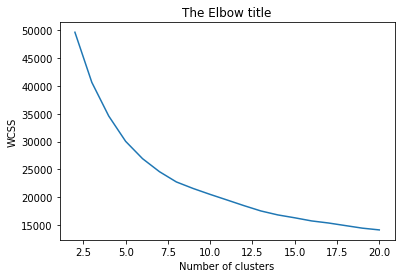

In [19]:
wcss=[]
for i in range(2,21):
    kmeans_test = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_test.fit(X_scaled)
    wcss_iter = kmeans_test.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(2,21)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [20]:
print(df)
print(X_scaled)

       Unnamed: 0  enrollee_id  city_development_index  experience  \
0               1        29725                   0.776          15   
1               4          666                   0.767          21   
2               6        28806                   0.920           5   
3               7          402                   0.762          13   
4               8        27107                   0.920           7   
...           ...          ...                     ...         ...   
12972       19149          251                   0.920           9   
12973       19150        32313                   0.920          10   
12974       19152        29754                   0.920           7   
12975       19155        24576                   0.920          21   
12976       19156         5756                   0.802           0   

       company_size  last_new_job  training_hours  target_int  cluster_label  
0                 2             5              47           0              1  
1

## XIII. Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot.

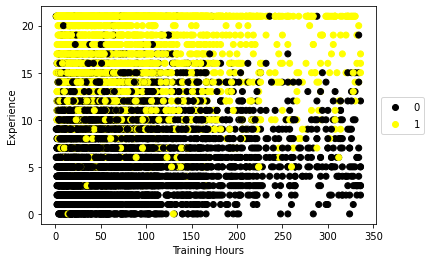

In [21]:
# plt.scatter(X_scaled[:,X_features.index("training_hours")],X_scaled[:,X_features.index("experience")],c=df['cluster_label'],cmap='gnuplot')
#scaled graph is the same
scatter = plt.scatter(df['training_hours'],df['experience'],c=df['cluster_label'],cmap='gnuplot')
plt.xlabel('Training Hours')
plt.ylabel('Experience')
plt.legend(*scatter.legend_elements(), loc='center left', bbox_to_anchor=(1.0, 0.5))

This model seems to have done a relativily good job of splitting the data into 2 clusters. We can tell from this plot that the model has determined Experience to be a much more signficant determing factor of our target compared to Training Hours. We can see that somewhere around Experience=12 the target becomes true.

## XIV. Show a scatter plot with any other two attributes you are interested in like 3 Xiii and add your thoughts on your plot as well

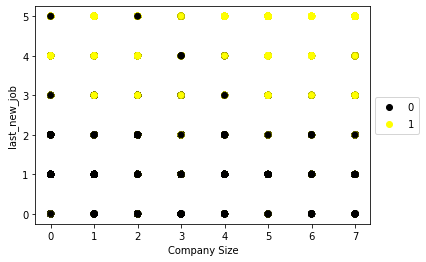

In [22]:
#plt.scatter(X_scaled[:,X_features.index('company_size')],X_scaled[:,X_features.index('last_new_job')],c=df['cluster_label'],cmap='gnuplot')
#scaled graph is the same
scatter = plt.scatter(df['company_size'],df['last_new_job'],c=df['cluster_label'],cmap='gnuplot')
plt.xlabel('Company Size')
plt.ylabel('last_new_job')
plt.legend(*scatter.legend_elements(), loc='center left', bbox_to_anchor=(1.0, 0.5))

Rather clear seperation into 2 clusters. We can see that Company Size does very little to determine the target. On the otherhand last_new_job seems rather signifcant. While there is some overlap we can see that around last_new_job 3 the target becomes true.

# 4. AgglomerativeClustering

## I. Plot a dendrogram (make the figure size relatively big, but still you will not be able to see it completely. However, it least this will give you an idea on how many cluster would you like to generate)

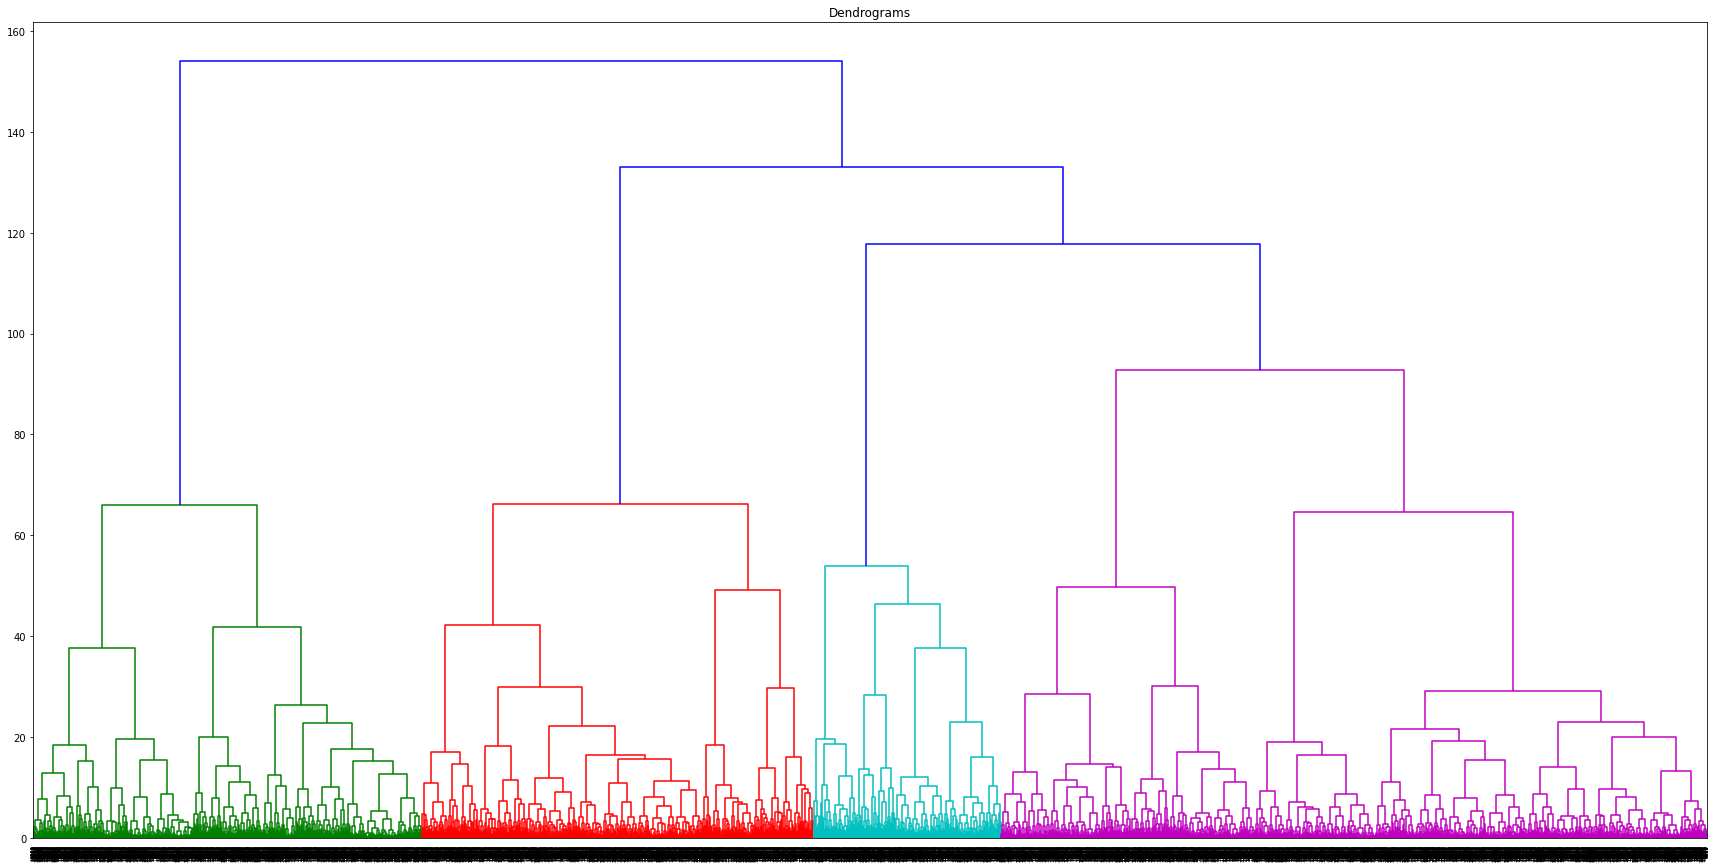

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

## II. Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' 

In [24]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering.fit(X_scaled)
print(clustering.labels_)

[1 1 0 ... 0 1 0]


## III. After creating the clusters, plot training hours against experience like 3.Xiii and discuss if anything interesting

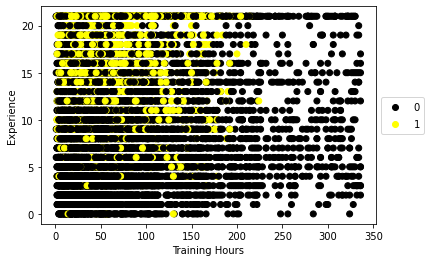

In [25]:
#plt.scatter(X_scaled[:,X_features.index("training_hours")],X_scaled[:,X_features.index("experience")],c=clustering.labels_,cmap='gnuplot')
# Scaled graph is the same
scatter = plt.scatter(df['training_hours'],df['experience'],c=clustering.labels_,cmap='gnuplot')
plt.xlabel('Training Hours')
plt.ylabel('Experience')
plt.legend(*scatter.legend_elements(), loc='center left', bbox_to_anchor=(1.0, 0.5))

This graph is rather interesting. Using AgglomerativeClustiner is the first time we see Training Hours have a more signficant influence on the Target. Here we can see that the same applies where the the target is heavily determined by Experience. However, we can also see that in this instance The number of trainingng hours effects the targer as well. Based of the chart at around 200 Training Hours the target turns false regardless of Experience.

## IV. Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference.

In [26]:
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering.fit(X_scaled)
print(clustering.labels_)

[1 1 0 ... 0 1 0]


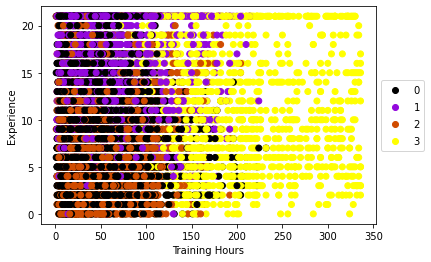

In [27]:
#plt.scatter(X_scaled[:,X_features.index("training_hours")],X_scaled[:,X_features.index("experience")],c=clustering.labels_,cmap='gnuplot')
#Scaled Graph is the same
scatter = plt.scatter(df['training_hours'],df['experience'],c=clustering.labels_,cmap='gnuplot')
plt.xlabel('Training Hours')
plt.ylabel('Experience')
plt.legend(*scatter.legend_elements(), loc='center left', bbox_to_anchor=(1.0, 0.5))

This graph is much harder to interpret, however fairly interesting and we can still make a few conculusion. For starters this graph is unique in that there is an entire cluster almost solely determined by training hours. Once training hours reaches a certain point around 125-150 Experience loses its influence. Before Training Hours reaches that point Experience is the determing factor, however it is very diffcult to pick out seperate clusters based on the plot. However, we can see that the higher experience typically results in target = 1, lower target = 2 and it is very hard to find a pattern that equates to target = 0.